**OASIS INFOBYTE**

**NAME:** **POOJA SHARMA**

**TASK 1:** **IRIS FLOWER CLASSIFICATION**

**BATCH:** **OCTOBER PHASE 2 OIBSIP**

**DOMAIN:** **DATA SCIENCE**

**TASK:** **Iris flower has three species; setosa, versicolor, and virginica, which differs according to their
measurements. Now assume that you have the measurements of the iris flowers according to
their species, and here your task is to train a machine learning model that can learn from the
measurements of the iris species and classify them.**

**IMPORT LIBRARIES**

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
from google.colab import files
upload = files.upload()

Saving Iris.csv to Iris.csv


**LOADING DATASET**

In [4]:
Iris = pd.read_csv('Iris.csv')
Iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


**DATA PRE-PROCESSING**

**#printing the top 5 rows**

In [5]:
Iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


**#printing the last 5 rows**

In [6]:
Iris.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


**#getting info about the dataset**

In [7]:
Iris.shape

(150, 6)

In [8]:
Iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [9]:
Iris.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [10]:
Iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


**CHECKING NULL VALUES**





In [11]:
Iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

####dropping the "Id" column from dataset

In [12]:
Iris = Iris.drop(columns = "Id")
Iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [13]:
Iris.value_counts("Species")

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

**Visualising The Data**

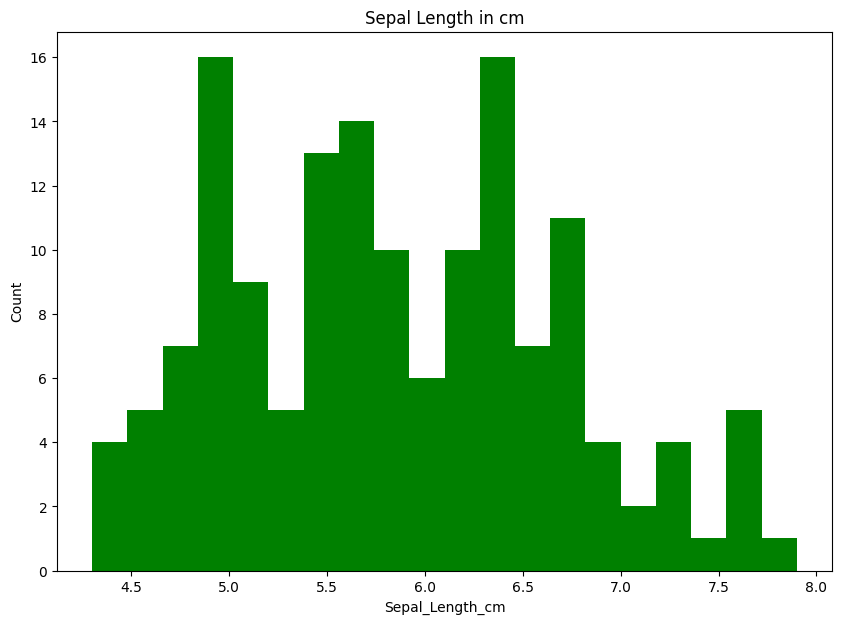

In [14]:
#plotting histogram of the Sepal Length Cm column
plt.figure(figsize = (10, 7))
x = Iris["SepalLengthCm"]

plt.hist(x, bins = 20, color = "green")
plt.title("Sepal Length in cm")
plt.xlabel("Sepal_Length_cm")
plt.ylabel("Count")
plt.show()

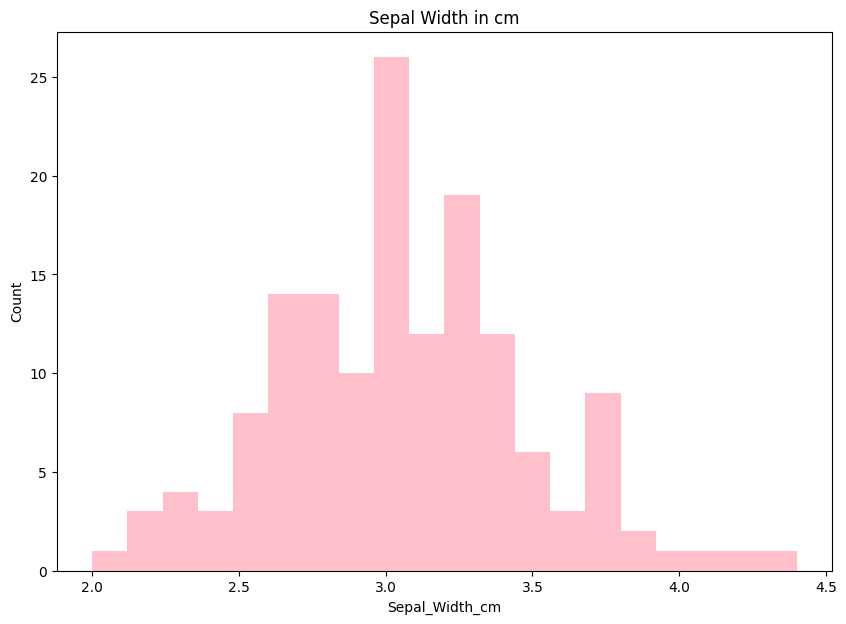

In [15]:
plt.figure(figsize = (10, 7))
x = Iris["SepalWidthCm"]

plt.hist(x, bins = 20, color = "pink")
plt.title("Sepal Width in cm")
plt.xlabel("Sepal_Width_cm")
plt.ylabel("Count")
plt.show()

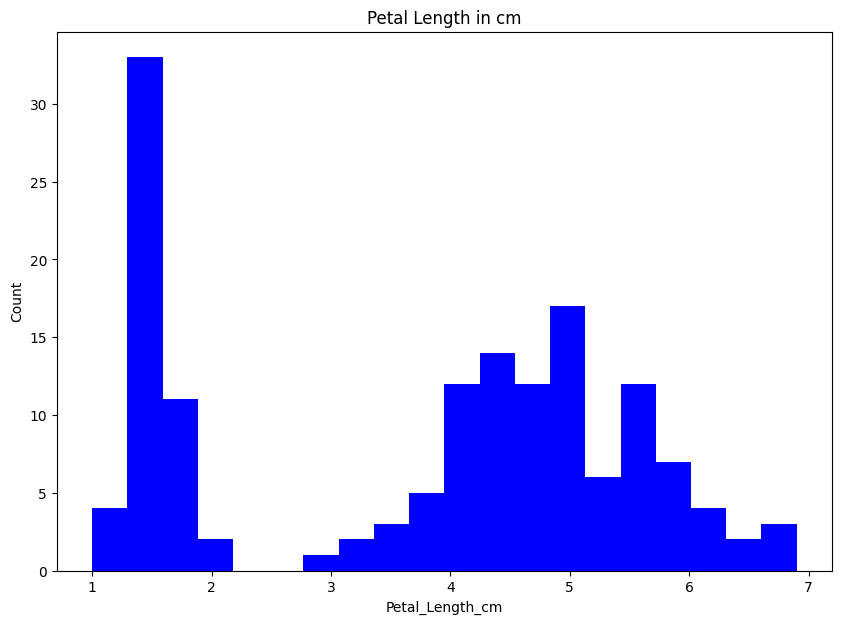

In [16]:
plt.figure(figsize = (10, 7))
x = Iris["PetalLengthCm"]

plt.hist(x, bins = 20, color = "blue")
plt.title("Petal Length in cm")
plt.xlabel("Petal_Length_cm")
plt.ylabel("Count")
plt.show()

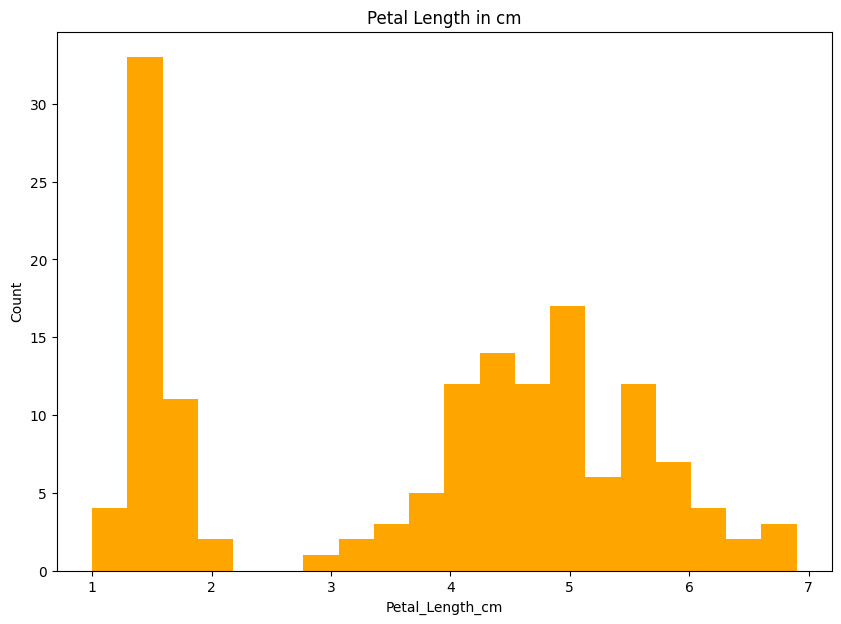

In [17]:
plt.figure(figsize = (10, 7))
x = Iris["PetalLengthCm"]

plt.hist(x, bins = 20, color = "orange")
plt.title("Petal Length in cm")
plt.xlabel("Petal_Length_cm")
plt.ylabel("Count")
plt.show()

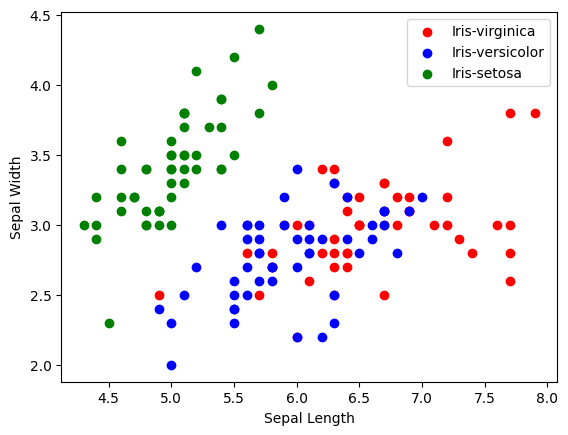

In [18]:
color = ['red', 'blue', 'green']
species = ['Iris-virginica', 'Iris-versicolor', 'Iris-setosa']

#plotting scatterplot of the Sepal Length Cm and Sepal Width Cm
for i in range(3):
  x = Iris[Iris['Species'] == species[i]]
  plt.scatter(x['SepalLengthCm'], x['SepalWidthCm'], color = color[i], label = species[i])
  plt.xlabel('Sepal Length')
  plt.ylabel('Sepal Width')
  plt.legend()


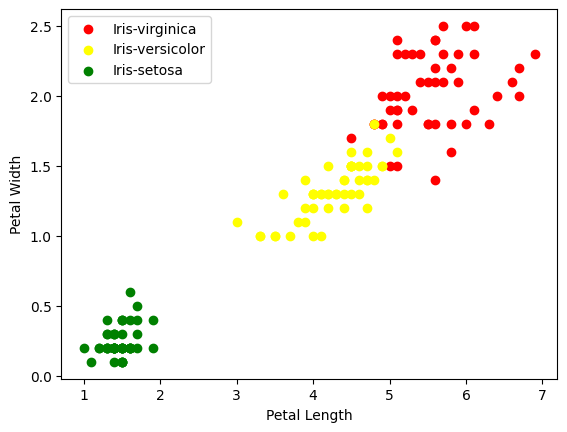

In [19]:
color = ['red', 'yellow', 'green']
#plotting scatterplot of the Petal Length Cm and Petal Width Cm
for i in range(3):
  x = Iris[Iris['Species'] == species[i]]
  plt.scatter(x['PetalLengthCm'], x['PetalWidthCm'], color = color[i], label = species[i])
  plt.xlabel('Petal Length')
  plt.ylabel('Petal Width')
  plt.legend()

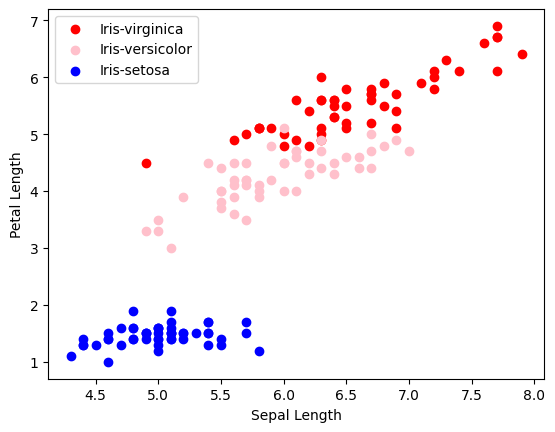

In [20]:
color = ['red', 'pink', 'blue']
#plotting scatterplot of the Sepal Length Cm and Petal Length Cm
for i in range(3):
  x = Iris[Iris['Species'] == species[i]]
  plt.scatter(x['SepalLengthCm'], x['PetalLengthCm'], color = color[i], label = species[i])
  plt.xlabel('Sepal Length')
  plt.ylabel('Petal Length')
  plt.legend()

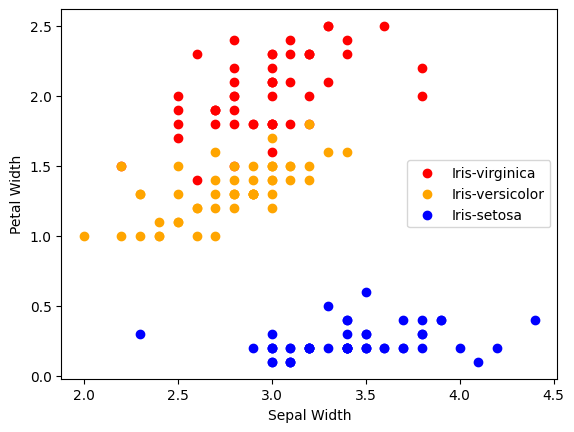

In [21]:
color = ['red', 'orange', 'blue']
#plotting scatterplot of the Sepal Width Cm and Petal Width Cm
for i in range(3):
  x = Iris[Iris['Species'] == species[i]]
  plt.scatter(x['SepalWidthCm'], x['PetalWidthCm'], color = color[i], label = species[i])
  plt.xlabel('Sepal Width')
  plt.ylabel('Petal Width')
  plt.legend()

In [22]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Iris['Species'] = le.fit_transform(Iris['Species'])
Iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [23]:
from sklearn.model_selection import train_test_split
X = Iris.drop(columns= ["Species"])
Y = Iris['Species']
x_train,x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)
print(x_train.shape)
print(x_test.shape)

(112, 4)
(38, 4)


In [24]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state = 0)
model.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [25]:
print("Accuracy:", model.score(x_test, y_test)*100)

Accuracy: 97.36842105263158


Text(0, 0.5, 'score')

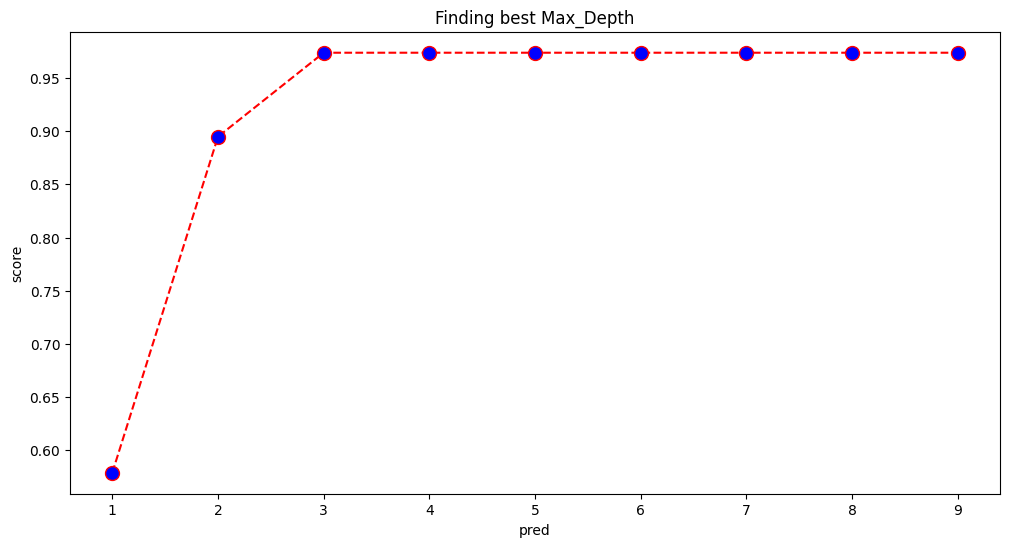

In [26]:
accuracy = []
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

for i in range(1, 10):
    model = DecisionTreeClassifier(max_depth = i, random_state = 0)
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    score = accuracy_score(y_test, pred)
    accuracy.append(score)

plt.figure(figsize=(12, 6))
plt.plot(range(1, 10), accuracy, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Finding best Max_Depth')
plt.xlabel('pred')
plt.ylabel('score')

In [27]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion = 'entropy',max_depth = 3, random_state = 0)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [29]:
y_pred = model.predict(x_test)

In [30]:
print("Accuracy:", model.score(x_test, y_pred)*100)

Accuracy: 100.0
